Making video ...
Complete


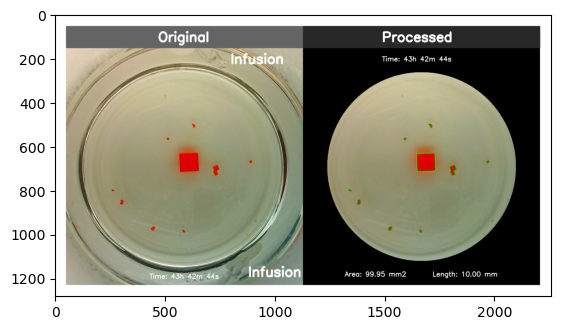

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import shutil

dir_A = "../Data/Video/fcg-images"
dir_B = "../Data/Video/fcg-images-processed"
save_dir = "../Data/Video/combined2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# Get paths for images
imagesA = glob.glob(os.path.join(dir_A, '*.jpg'))
imagesA.sort()
imagesB = glob.glob(os.path.join(dir_B, '*.jpg'))
imagesB.sort()

color = (40,40,40)

print('Combining images ...')

for i in range(len(imagesA)):

    # Background White
    width = 2260
    height = 1280
    background = np.zeros((height, width, 3), np.uint8)
    background.fill(255)  # white

    # Read images
    imageA = cv2.imread(imagesA[i]) #1080 x 1080
    imageB = cv2.imread(imagesB[i]) #1080 x 1080

    # Put images on the background
    background[150:1230, 50:1130] = imageA
    background[150:1230, 1130:1130+1080] = imageB
    
    # put rectangle
    cv2.rectangle(background, (50,50), (1130,150), (100,100,100), -1)
    cv2.rectangle(background, (1130,50), (2210,150), (40,40,40), -1)
    
    # text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(background, "Original", (470,120), font, 2, (255,255,255), 8)
    cv2.putText(background, "Processed", (1490,120), font, 2, (255,255,255), 8)

    cv2.putText(background, "Infusion", (800,220), font, 2, (255,255,255), 8)
    cv2.putText(background, "Infusion", (880,1190), font, 2, (255,255,255), 8)

    # save images
    cv2.imwrite(f'{save_dir}/{i:03}.jpg', background)

def images_to_video(directory,frame_rate,size,output):
    
    # Get all jpg files in the directory
    images = glob.glob(os.path.join(directory, '*.jpg'))
    images.sort()

    # Set up the video writer
    video = cv2.VideoWriter(output, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, size)

    # Convert images to video
    for img in images:
        image = cv2.imread(img)
        image_resized = cv2.resize(image, size)
        video.write(image_resized)

    # Release the writer
    video.release()

print('Making video ...')

# Path to the directory containing images
directory = '../Data/Video/combined2'
save_dir = "../Data/Video" 
save_name = f"{save_dir}/video2.mov" # filename

# Settings for the output video
output = save_name
frame_rate = 10  # Frame rate
size = (width, height)  # Size of the output video

images_to_video(directory,frame_rate,size,output)
shutil.rmtree('../Data/Video/combined2')
print('Complete')
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))    